(epoch5)https://github.com/sahersohail013/assignment2/blob/main/xception_5epochs.ipynb <br>

Initial model for xception but modified for training with in time constraints

**MOUNTING DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/315_Birds_Species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VARIED THRUSH/029.jpg  
  inflating: train/VARIED THRUSH/030.jpg  
  inflating: train/VARIED THRUSH/031.jpg  
  inflating: train/VARIED THRUSH/032.jpg  
  inflating: train/VARIED THRUSH/033.jpg  
  inflating: train/VARIED THRUSH/034.jpg  
  inflating: train/VARIED THRUSH/035.jpg  
  inflating: train/VARIED THRUSH/036.jpg  
  inflating: train/VARIED THRUSH/037.jpg  
  inflating: train/VARIED THRUSH/038.jpg  
  inflating: train/VARIED THRUSH/039.jpg  
  inflating: train/VARIED THRUSH/040.jpg  
  inflating: train/VARIED THRUSH/041.jpg  
  inflating: train/VARIED THRUSH/042.jpg  
  inflating: train/VARIED THRUSH/043.jpg  
  inflating: train/VARIED THRUSH/044.jpg  
  inflating: train/VARIED THRUSH/045.jpg  
  inflating: train/VARIED THRUSH/046.jpg  
  inflating: train/VARIED THRUSH/047.jpg  
  inflating: train/VARIED THRUSH/048.jpg  
  inflating: train/VARIED THRUSH/049.jpg  
  inflating: train/VARIED THRUSH/050.jpg  
  i

**IMPORTS AND DATA**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import glob
import time
import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train="/content/train"
test="/content/test"
valid="/content/valid"


**PREPROCESSING**

In [5]:
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import random
from keras.preprocessing.image import load_img



In [9]:
height = 224
width = 224
batch_size = 300

train_datagen = keras.preprocessing.image.ImageDataGenerator( 
                                            rescale=1./255, 
                                            rotation_range=40, 
                                            width_shift_range=0.2,
                                            height_shift_range=0.2, 
                                            zoom_range=0.2,
                                            horizontal_flip=True, 
                                            fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
                                            train,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle=True,
                                            class_mode='categorical'
)
test_datagen = keras.preprocessing.image.ImageDataGenerator(
                                            rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
                                            test,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle = False,
                                            class_mode = "categorical"
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
                                            rescale = 1./255
)

valid_generator = valid_datagen.flow_from_directory(
                                            valid,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle = False,
                                            class_mode = "categorical")
train_num = train_generator.samples
test_num = test_generator.samples
valid_num = valid_generator.samples

print(train_num, test_num, valid_num)

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
45980 1575 1575


**XCEPTION MODEL**

Keras api for xception model
(https://)https://keras.io/api/applications/xception/

In [14]:
covn_base = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False)
covn_base.trainable = True

for layers in covn_base.layers[:-32]:
    layers.trainable = False

model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(315))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [16]:
epochs = 2

Early_sp = EarlyStopping(monitor = 'val_accuracy', patience = 5,restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

history = model.fit(
                    train_generator,
                    steps_per_epoch = train_num // batch_size,
                    epochs = epochs,
                    validation_data = valid_generator,
                    validation_steps = valid_num // batch_size,
                    callbacks = [Early_sp,reduce_lr]
)

Epoch 1/2
153/153 [==============================] - 14580s 95s/step - loss: 4.4921 - accuracy: 0.0498 - val_loss: 15.8348 - val_accuracy: 0.0200 - lr: 0.1000
Epoch 2/2
153/153 [==============================] - 14658s 96s/step - loss: 3.6138 - accuracy: 0.1328 - val_loss: 10.5908 - val_accuracy: 0.0580 - lr: 0.1000


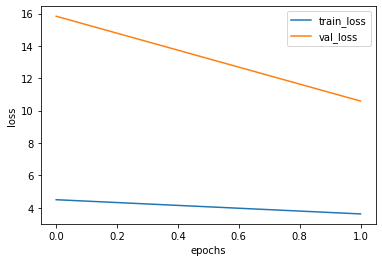

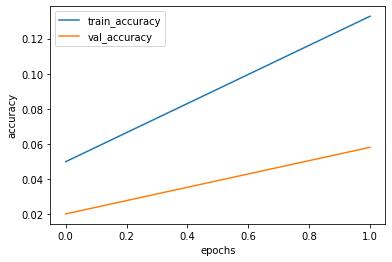

In [18]:
from matplotlib import pyplot as plt

history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]

# figure 1
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# figure 2
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [19]:
scores = model.evaluate(test_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

6/6 [==============================] - 258s 42s/step - loss: 10.8233 - accuracy: 0.0578
Test loss: 10.823346138000488
Test accuracy: 0.057777777314186096


In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 315)               645435    
                                                                 
Total params: 21,506,915
Trainable params: 10,123,779
Non-trainable params: 11,383,136
_________________________________________________________________


**PERFOMANCE MATRICES**

In [23]:
import numpy as numpy

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory("/content/test", # Put your path here
     target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions,axis=1)

Found 1575 images belonging to 315 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


In [24]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   


In [25]:

from sklearn.metrics import classification_report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                             precision    recall  f1-score   support

      AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
          AFRICAN FIREFINCH       0.00      0.00      0.00         5
                  ALBATROSS       0.00      0.00      0.00         5
       ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
            AMERICAN AVOCET       0.00      0.00      0.00         5
           AMERICAN BITTERN       0.00      0.00      0.00         5
              AMERICAN COOT       0.00      0.00      0.00         5
         AMERICAN GOLDFINCH       0.00      0.00      0.00         5
           AMERICAN KESTREL       0.00      0.00      0.00         5
             AMERICAN PIPIT       0.00      0.00      0.00         5
          AMERICAN REDSTART       0.00      0.00      0.00         5
                    ANHINGA       0.00      0.00      0.00         5
          ANNAS HUMMINGBIRD       0.00      0.00      0.00         5
                    ANTBIRD      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


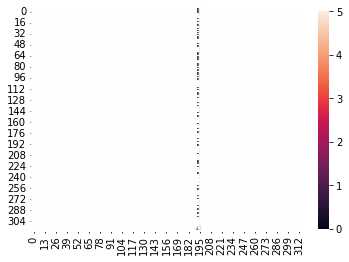

In [26]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot = True)
